# Exploration and Analysis of Expected Points Added (EPA) in NFL Play-by-Play Data

In this project, I am exploring the Expected Points Added (EPA) statistic from play-by-play NFL data from the 2022 season. I am specifically interested in the performance of Kenneth Walker, running back for the Seattle Seahawks, as I am looking to understand why the Seahawks drafted Zach Charbonnet in the second round of the draft, despite Walker amassing over 1,000 rushing yards in his rookie season.

I will be using the nfl_data_py Python library for my analysis. Please see documentation on the library here: https://github.com/cooperdff/nfl_data_py

In [1]:
import nfl_data_py as nfl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_2022 = nfl.import_pbp_data([2022]) #This pulls the play-by-play data for the 2022 season.

2022 done.
Downcasting floats.


In [3]:
#for x in df_2022.columns:
#    print(x)

To start my exploration, I took a look at the data available in the dataset. There are over 350 columns! I have commented out the print statement for the code version that will be available for review. Next, I proceeded to isolate the columns I wanted to explore in my analysis:

In [4]:
cols = ['rusher_player_name', 'rusher_player_id','play_id','week','down', 'yardline_100', 'ydstogo' ,'yards_gained', 'ep','epa', 'rush_touchdown']

In [7]:
runs_22 = df_2022.loc[(df_2022['season_type'] == 'REG') & (df_2022['play_type'] == 'run'), cols]
runs_22

,rusher_player_name,rusher_player_id,play_id,week,down,yardline_100,ydstogo,yards_gained,ep,epa,rush_touchdown
2,Mi.Carter,00-0036924,68.0,1,1.0,78.0,10.0,19.0,1.030577,1.468819,0.0
4,Mi.Carter,00-0036924,115.0,1,2.0,59.0,10.0,5.0,2.007203,-0.325931,0.0
9,L.Jackson,00-0034796,254.0,1,3.0,64.0,2.0,4.0,0.922567,0.895055,0.0
10,K.Drake,00-0033118,275.0,1,1.0,60.0,10.0,0.0,1.817623,-0.529274,0.0
12,K.Drake,00-0033118,330.0,1,3.0,52.0,2.0,1.0,1.699480,-1.866572,0.0
...,...,...,...,...,...,...,...,...,...,...,...
47821,D.Henry,00-0032764,3363.0,18,1.0,69.0,10.0,3.0,1.335977,-0.355052,0.0
47822,D.Henry,00-0032764,3384.0,18,2.0,66.0,7.0,1.0,0.980925,-0.456378,0.0
47826,J.Dobbs,00-0033949,3473.0,18,1.0,75.0,10.0,11.0,0.916978,0.635348,0.0
47827,D.Henry,00-0032764,3499.0,18,1.0,64.0,10.0,9.0,1.552326,0.517224,0.0


I filtered the data set into a smaller table containing just regular season plays and the columns I had identified.

In [8]:
ids_22 = runs_22[['rusher_player_name', 'rusher_player_id']]
ids_22 = ids_22.drop_duplicates()

I also created a sub-table containing just the player names and IDs.

In [10]:
top_runners = runs_22.groupby('rusher_player_name')[['yards_gained', 'rush_touchdown']].agg('sum')
top_runners = top_runners.loc[top_runners['yards_gained'] >= 1000]
top_runners = pd.merge(top_runners, ids_22, on='rusher_player_name')
top_runners = top_runners.rename(columns={'rusher_player_name':'name', 'rusher_player_id':'player_id'})
top_runners

,name,yards_gained,rush_touchdown,player_id
0,A.Jones,1121.0,2.0,00-0033293
1,C.McCaffrey,1139.0,8.0,00-0033280
2,D.Cook,1173.0,8.0,00-0033893
3,D.Henry,1538.0,13.0,00-0032764
4,J.Fields,1150.0,8.0,00-0036945
5,J.Jacobs,1653.0,12.0,00-0035700
6,Ja.Williams,1068.0,17.0,00-0033948
7,K.Walker,1050.0,9.0,00-0038134
8,M.Sanders,1269.0,11.0,00-0035243
9,N.Chubb,1527.0,12.0,00-0034791


I filtered the table again to only include the "top runners" in 2022; i.e, the players who accumulated over a thousand rushing yards. I will use this table again later to only include play-by-play data for the top runners.

In [11]:
roster = nfl.import_rosters([2022])
pos = roster[['player_id', 'position']]
pos

,player_id,position
0,00-0029747,DB
1,00-0032560,DB
2,00-0032933,DB
3,00-0033890,DB
4,00-0033568,DB
...,...,...
2636,00-0036340,WR
2637,00-0036626,WR
2638,00-0036671,WR
2639,00-0037741,WR


I pulled in the rosters table from the library. I will use the positions columns here to filter my top_runners table for just RBs.

In [12]:
top_runners = pd.merge(top_runners, pos, on='player_id')
top_runners

,name,yards_gained,rush_touchdown,player_id,position
0,A.Jones,1121.0,2.0,00-0033293,RB
1,C.McCaffrey,1139.0,8.0,00-0033280,RB
2,D.Cook,1173.0,8.0,00-0033893,RB
3,D.Henry,1538.0,13.0,00-0032764,RB
4,J.Fields,1150.0,8.0,00-0036945,QB
5,J.Jacobs,1653.0,12.0,00-0035700,RB
6,Ja.Williams,1068.0,17.0,00-0033948,RB
7,K.Walker,1050.0,9.0,00-0038134,RB
8,M.Sanders,1269.0,11.0,00-0035243,RB
9,N.Chubb,1527.0,12.0,00-0034791,RB


In [13]:
top_rbs = top_runners[top_runners['position']=='RB']
top_rbs

,name,yards_gained,rush_touchdown,player_id,position
0,A.Jones,1121.0,2.0,00-0033293,RB
1,C.McCaffrey,1139.0,8.0,00-0033280,RB
2,D.Cook,1173.0,8.0,00-0033893,RB
3,D.Henry,1538.0,13.0,00-0032764,RB
5,J.Jacobs,1653.0,12.0,00-0035700,RB
6,Ja.Williams,1068.0,17.0,00-0033948,RB
7,K.Walker,1050.0,9.0,00-0038134,RB
8,M.Sanders,1269.0,11.0,00-0035243,RB
9,N.Chubb,1527.0,12.0,00-0034791,RB
10,N.Harris,1034.0,7.0,00-0036893,RB


Great - I merged my tables and filtered for solely RBs. This will focus my analysis on players comparable to Kenneth Walker. Now that I have my top running backs, I am going back to the play-by-play runs table to grab the plays by running backs that accumulated at least 1,000 rushing yards.

In [14]:
runs_by_top_rbs = runs_22[runs_22['rusher_player_name'].isin(top_rbs['name'])]
runs_by_top_rbs

,rusher_player_name,rusher_player_id,play_id,week,down,yardline_100,ydstogo,yards_gained,ep,epa,rush_touchdown
347,N.Chubb,00-0034791,158.0,1,1.0,65.0,10.0,11.0,1.423470,0.906599,0.0
349,N.Chubb,00-0034791,213.0,1,2.0,52.0,8.0,5.0,1.895356,-0.386453,0.0
351,N.Chubb,00-0034791,251.0,1,3.0,47.0,3.0,4.0,1.508902,1.090143,0.0
353,N.Chubb,00-0034791,296.0,1,2.0,37.0,4.0,1.0,2.955942,-0.623509,0.0
356,C.McCaffrey,00-0033280,361.0,1,1.0,64.0,10.0,4.0,2.481606,-0.214152,0.0
...,...,...,...,...,...,...,...,...,...,...,...
47816,D.Henry,00-0032764,3249.0,18,2.0,85.0,5.0,2.0,0.184346,-0.579280,0.0
47818,D.Henry,00-0032764,3299.0,18,1.0,80.0,10.0,9.0,0.634272,0.787845,0.0
47821,D.Henry,00-0032764,3363.0,18,1.0,69.0,10.0,3.0,1.335977,-0.355052,0.0
47822,D.Henry,00-0032764,3384.0,18,2.0,66.0,7.0,1.0,0.980925,-0.456378,0.0


In [16]:
top_rbs_grouped = runs_by_top_rbs.groupby('rusher_player_name').agg(attempts=('rusher_player_id', 'count'),
                                                                    rushing_yards=('yards_gained','sum'),
                                                                    rushing_tds=('rush_touchdown', 'sum'),
                                                                    total_epa=('epa', 'sum'),
                                                                    positive_pct_epa=('epa', lambda x: (x>0).mean()))
top_rbs_grouped.sort_values(by='positive_pct_epa',ascending=False)

,attempts,rushing_yards,rushing_tds,total_epa,positive_pct_epa
rusher_player_name,,,,,
M.Sanders,260,1269.0,11.0,12.698614,0.488462
A.Jones,213,1121.0,2.0,12.084998,0.464789
J.Jacobs,341,1653.0,12.0,-1.681085,0.442815
N.Chubb,303,1527.0,12.0,14.278028,0.435644
T.Allgeier,211,1037.0,3.0,11.342580,0.431280
Ja.Williams,263,1068.0,17.0,-24.973522,0.429658
T.Etienne,221,1127.0,5.0,-8.693549,0.407240
R.Stevenson,210,1020.0,5.0,-9.571356,0.404762
N.Harris,272,1034.0,7.0,-28.651573,0.404412


I aggregate the runs_by_top_rbs table in a similar manner to earlier, but I have now added the columns that let me explore Expected Points Added (EPA). I also calculated an additional column that shows me the percentage of a running back's plays that created positive EPA. I am interested in the consistency with which these players create positive outcomes for their teams, not just the volume.

In [17]:
def format_pct(x):
    return '{:.2%}'.format(x)

top_rbs_grouped['positive_pct_epa'] = top_rbs_grouped['positive_pct_epa'].map(format_pct)

In [18]:
top_rbs_grouped.sort_values(by='positive_pct_epa',ascending=False)

,attempts,rushing_yards,rushing_tds,total_epa,positive_pct_epa
rusher_player_name,,,,,
M.Sanders,260,1269.0,11.0,12.698614,48.85%
A.Jones,213,1121.0,2.0,12.084998,46.48%
J.Jacobs,341,1653.0,12.0,-1.681085,44.28%
N.Chubb,303,1527.0,12.0,14.278028,43.56%
T.Allgeier,211,1037.0,3.0,11.342580,43.13%
Ja.Williams,263,1068.0,17.0,-24.973522,42.97%
T.Etienne,221,1127.0,5.0,-8.693549,40.72%
R.Stevenson,210,1020.0,5.0,-9.571356,40.48%
N.Harris,272,1034.0,7.0,-28.651573,40.44%


As I stated at the start, the question I wanted to explore was why Seahawks spent a second round pick on competition for Kenneth Walker, despite his 1,000 yard season (and second round capital the year before). The hypothesis was that Walker was inconsistent from down-to-down, and accumulated a lot of his yards on isolated plays with his ability to break off big runs. When you look at the percentage of positive EPA plays, you see this loud and clear: Walker ranked last amongst 1,000+ yard rushers in his percentage of positive plays. He only added to the team's expected points on a third of his rushing attempts.

In [21]:
kw = runs_by_top_rbs.loc[runs_by_top_rbs['rusher_player_name']=='K.Walker']
kw_week = kw.groupby('week').agg(attempts=('rusher_player_id', 'count'),
                                 rushing_yards=('yards_gained','sum'),
                                 rushing_tds=('rush_touchdown', 'sum'),
                                 total_epa=('epa', 'sum'),
                                 positive_pct_epa=('epa', lambda x: (x>0).mean()))
kw_week

,attempts,rushing_yards,rushing_tds,total_epa,positive_pct_epa
week,,,,,
2,4,10.0,0.0,-0.513915,0.500000
3,3,19.0,0.0,-1.465731,0.333333
4,8,29.0,0.0,-1.229277,0.250000
5,8,88.0,1.0,2.237305,0.250000
6,21,97.0,1.0,-3.246535,0.238095
7,23,167.0,2.0,5.580170,0.391304
8,18,51.0,1.0,-2.624223,0.166667
9,26,109.0,2.0,3.398638,0.423077
10,10,17.0,0.0,-5.197394,0.300000


I wanted to dive deeper into Walker's weekly performance. I grouped his play-by-play data by week to do so. Next, let's take a look at his best performance, both by rushing yards and EPA (Week 7), and what was a good performance by rushing yards, but one of his worst by EPA (Week 18).

In [22]:
kw7 = kw.loc[kw['week']==7, ['rusher_player_name','week', 'play_id','down','yardline_100','ydstogo','yards_gained','ep','epa']]
kw7 = kw7.rename(columns={'ep':'team_ep_before_play'})
kw7['attempt_counter'] = range(1, len(kw7) + 1)
kw7['yard_counter'] = np.cumsum(kw7['yards_gained'])
kw7['epa_counter'] = np.cumsum(kw7['epa'])
kw7

,rusher_player_name,week,play_id,down,yardline_100,ydstogo,yards_gained,team_ep_before_play,epa,attempt_counter,yard_counter,epa_counter
18776,K.Walker,7,88.0,1.0,65.0,10.0,0.0,1.575059,-0.580195,1,0.0,-0.580195
18777,K.Walker,7,109.0,2.0,65.0,10.0,15.0,0.994864,1.734215,2,15.0,1.154020
18788,K.Walker,7,470.0,1.0,46.0,10.0,7.0,2.717575,0.307068,3,22.0,1.461088
18792,K.Walker,7,576.0,1.0,16.0,10.0,-4.0,4.900182,-1.255408,4,18.0,0.205680
18806,K.Walker,7,881.0,1.0,12.0,10.0,12.0,5.055352,1.944648,5,30.0,2.150329
18814,K.Walker,7,1052.0,1.0,19.0,10.0,1.0,4.586206,-0.353124,6,31.0,1.797204
18841,K.Walker,7,1637.0,1.0,75.0,10.0,8.0,1.514704,0.394342,7,39.0,2.191547
18842,K.Walker,7,1658.0,2.0,67.0,2.0,3.0,1.909046,0.248402,8,42.0,2.439948
18843,K.Walker,7,1679.0,1.0,64.0,10.0,2.0,2.157448,-0.421411,9,44.0,2.018537
18855,K.Walker,7,1987.0,1.0,34.0,10.0,2.0,3.699923,-0.443786,10,46.0,1.574751


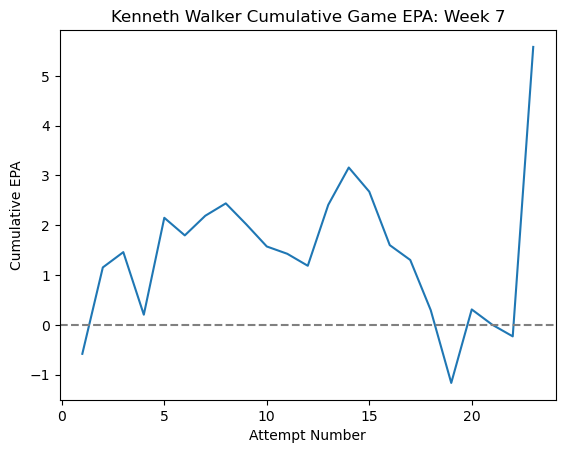

In [23]:
plt.plot(kw7['attempt_counter'],kw7['epa_counter'])
plt.axhline(y=0, color='grey', linestyle='--')
plt.xlabel('Attempt Number')
plt.ylabel('Cumulative EPA')
plt.title('Kenneth Walker Cumulative Game EPA: Week 7')
plt.show()

Visualizing data can make it much easier to draw insights. The truth of his Week 7 performance is that Walker's EPA actually stood around 0, up until his final attempt - a 74 yard breakaway run for a touchdown. The second half of Walker's game was especially weak from an EPA point of view, consistently producing negative plays that set the team back. While the impact of the offensive line's performance is missing from this measure, Walker's inconsistency within games must have played a part in the Seahawks decision to spend up on another RB.

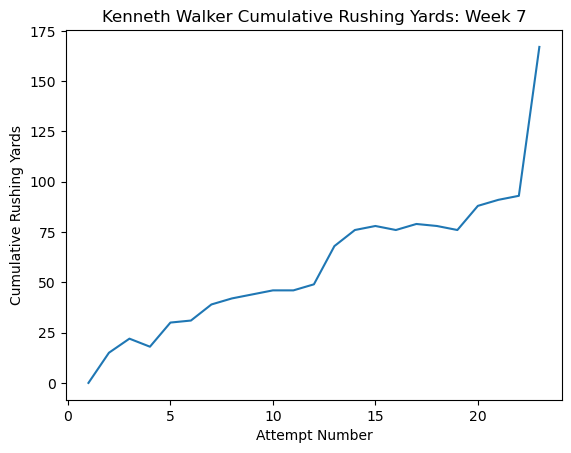

In [24]:
plt.plot(kw7['attempt_counter'],kw7['yard_counter'])
plt.xlabel('Attempt Number')
plt.ylabel('Cumulative Rushing Yards')
plt.title('Kenneth Walker Cumulative Rushing Yards: Week 7')
plt.show()

We can see the long rushing touchdown here in his Week 7 cumulative game rushing yard chart. A great performance ultimately in the box score, but one that doesn't reveal his struggles within the game itself. Let's turn to Week 18.

In [25]:
kw18 = kw.loc[kw['week']==18, ['rusher_player_name','week', 'play_id','down','yardline_100','ydstogo','yards_gained','ep','epa']]
kw18 = kw18.rename(columns={'ep':'team_ep_before_play'})
kw18['attempt_counter'] = range(1, len(kw18) + 1)
kw18['yard_counter'] = np.cumsum(kw18['yards_gained'])
kw18['epa_counter'] = np.cumsum(kw18['epa'])
kw18

,rusher_player_name,week,play_id,down,yardline_100,ydstogo,yards_gained,team_ep_before_play,epa,attempt_counter,yard_counter,epa_counter
46633,K.Walker,18,187.0,1.0,75.0,10.0,5.0,1.534609,0.008928,1,5.0,0.008928
46634,K.Walker,18,208.0,2.0,70.0,5.0,9.0,1.543537,0.829967,2,14.0,0.838895
46636,K.Walker,18,260.0,2.0,58.0,7.0,1.0,2.072913,-0.691897,3,15.0,0.146998
46638,K.Walker,18,310.0,1.0,50.0,10.0,9.0,3.031503,0.675692,4,24.0,0.822691
46641,K.Walker,18,377.0,1.0,19.0,15.0,2.0,4.436559,-0.353988,5,26.0,0.468702
46650,K.Walker,18,557.0,1.0,49.0,10.0,4.0,3.036943,-0.206052,6,30.0,0.262650
46653,K.Walker,18,630.0,2.0,28.0,1.0,6.0,4.451782,0.323783,7,36.0,0.586434
46655,K.Walker,18,682.0,2.0,20.0,8.0,-1.0,4.303472,-0.681150,8,35.0,-0.094716
46670,K.Walker,18,1003.0,1.0,80.0,15.0,8.0,0.503383,0.366961,9,43.0,0.272245
46685,K.Walker,18,1366.0,1.0,69.0,10.0,-2.0,1.329678,-0.879633,10,41.0,-0.607389


You can tell this game was a slog. Another 100-yd game for Walker, but cumulatively, he nearly lost a whole touchdown for the Seahawks with negative outcomes on plays. His struggles were especially encapsulated by the following plays within the opposition's 5:

In [26]:
kw18.loc[kw18['yardline_100']<=5.0]

,rusher_player_name,week,play_id,down,yardline_100,ydstogo,yards_gained,team_ep_before_play,epa,attempt_counter,yard_counter,epa_counter
46773,K.Walker,18,3325.0,2.0,4.0,1.0,2.0,5.776537,0.323102,19,78.0,-0.771141
46774,K.Walker,18,3346.0,1.0,2.0,2.0,1.0,6.099640,-0.093884,20,79.0,-0.865026
46776,K.Walker,18,3374.0,2.0,1.0,1.0,0.0,6.005755,-0.406390,21,79.0,-1.271415
46778,K.Walker,18,3397.0,3.0,1.0,1.0,-3.0,5.599366,-2.651750,22,76.0,-3.923165


Walker had 4 attempts within the 5, and he came away without a touchdown. We'll explore this in more detail later on, but his inability to convert prime opportunities into touchdowns is surely a big factor in the drafting of Charbonnet, who profiles as a physical bruiser.

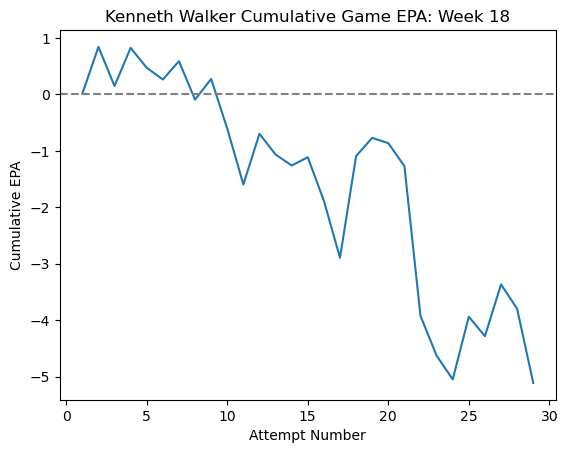

In [27]:
plt.plot(kw18['attempt_counter'],kw18['epa_counter'])
plt.axhline(y=0, color='grey', linestyle='--')
plt.xlabel('Attempt Number')
plt.ylabel('Cumulative EPA')
plt.title('Kenneth Walker Cumulative Game EPA: Week 18')
plt.show()

We can see his struggle clearly laid out in this visualization of cumulative EPA. His game was littered with negative outcome plays that reduced the Seahawks' likelihood of scoring. The major drop seen at attempts 20-22 came from 3 consecutive attempts at the goal-line, coming away without a touchdown. The failure to convert on 3rd down from the one accounted for -2.65 EPA.

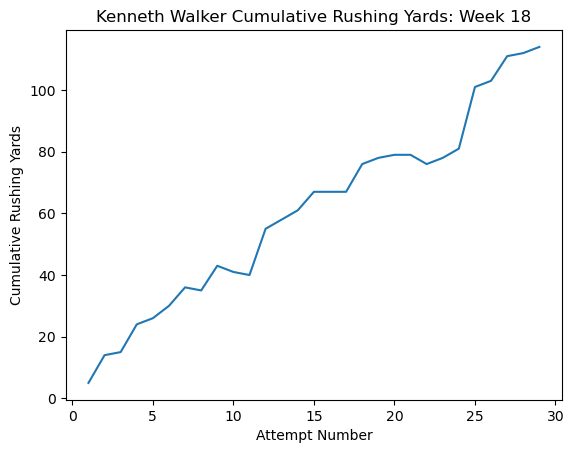

In [18]:
plt.plot(kw18['attempt_counter'],kw18['yard_counter'])
plt.xlabel('Attempt Number')
plt.ylabel('Cumulative Rushing Yards')
plt.title('Kenneth Walker Cumulative Rushing Yards: Week 18')
plt.show()

It's hard to call a 100 yard game a poor one! But the main priority for NFL teams is to win. Walker's inconsistency from down-to-down, and his struggles on the goal-line, reduced the Seahawks' chances of winning.

The insight from isolating Week 18 made me want to explore Walker's overall performance from scoring positions. Let's look at his attempts from within the 10:

In [28]:
kw_10 = kw.loc[kw['yardline_100'] <= 10.0]
kw_10

,rusher_player_name,rusher_player_id,play_id,week,down,yardline_100,ydstogo,yards_gained,ep,epa,rush_touchdown
10959,K.Walker,00-0038134,3503.0,4,2.0,9.0,5.0,2.0,5.008211,-0.502383,0.0
14242,K.Walker,00-0038134,1216.0,6,3.0,7.0,2.0,-2.0,4.688499,-1.783444,0.0
18900,K.Walker,00-0038134,2987.0,7,2.0,6.0,6.0,-1.0,5.137220,-1.008067,0.0
20963,K.Walker,00-0038134,1155.0,8,1.0,3.0,3.0,0.0,6.143642,-0.412647,0.0
23664,K.Walker,00-0038134,1003.0,9,1.0,2.0,2.0,-2.0,6.255059,-0.826220,0.0
23764,K.Walker,00-0038134,3372.0,9,1.0,1.0,1.0,1.0,6.409039,0.590962,1.0
23795,K.Walker,00-0038134,4083.0,9,1.0,5.0,5.0,5.0,5.278776,1.721224,1.0
33977,K.Walker,00-0038134,1186.0,13,1.0,4.0,4.0,0.0,5.929771,-0.435297,0.0
44556,K.Walker,00-0038134,418.0,17,2.0,10.0,3.0,4.0,5.252364,0.544522,0.0
44557,K.Walker,00-0038134,439.0,17,1.0,6.0,6.0,2.0,5.796886,-0.099374,0.0


In [30]:
print(kw_10['epa'].sum())
print(kw_10['epa'].sum()/kw_10['epa'].count())
print(kw_10['rush_touchdown'].sum()/kw_10['rush_touchdown'].count())

-6.921679
-0.43260493874549866
0.125


Walker had 16 attempts from within the 10, scoring 2 touchdowns (12.5% of his attempts). He lost the Seahawks 1 cumulative touchdown through his attempts, and reduced their chance of scoring a touchdown by 6% (0.43/7) on each attempt. Not great. Let's look at the numbers from other top rushers:

In [33]:
runs_by_top_rbs_10 = runs_by_top_rbs.loc[runs_by_top_rbs['yardline_100'] <= 10.0]
print(runs_by_top_rbs_10['rush_touchdown'].sum())
print(runs_by_top_rbs_10['rush_touchdown'].count())
print(runs_by_top_rbs_10['epa'].sum()/runs_by_top_rbs_10['epa'].count())
print(runs_by_top_rbs_10['rush_touchdown'].sum()/runs_by_top_rbs_10['rush_touchdown'].count())

87.0
324
0.025602776327250915
0.26851851851851855


Of the running backs that accumulated over 1,000 yards, these backs had 324 attempts from within the 10, scoring 87 touchdowns, or a touchdown on ~27% of attempts. These running backs added 0.3% to their team's EPA with each attempt (0.026/7). Walker significantly underperformed both metrics. By looking at his plays in the 10, you can see why the Seahawks would want to bring in a back with the profile to convert these plays.

Of course, we can't discount the fact that the Seahawks O-Line was a poor unit in 2022, but the evidence uncovered in this analysis stacks up poorly for Kenneth Walker. We have learned that Walker ranked bottom amongst top rushers in terms of percentage of positive EPA plays, and significantly underperformed in scoring situations. It is no surprise that the Seahawks chose to add to their RB room, especially when they had extra draft capital in hand.

Thank you for reading!